In [2]:
### Importamos las librerias.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Carga de datos
df_users_items = pd.read_csv('./aust_users_items.csv')
df_play_name = pd.read_csv('./aust_users_play_name.csv')

# Unión de los dataframes en base a 'user_id'
df_combined = pd.merge(df_users_items, df_play_name, on='user_id')





C:\Users\Carlos Andres\AppData\Local\Temp\ipykernel_11660\1338202967.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df_combined.info()
df_combined.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5272423 entries, 0 to 5272422
Data columns (total 9 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_id           object
 1   items_count       int64 
 2   steam_id          int64 
 3   user_url          object
 4   items             object
 5   item_id           int64 
 6   item_name         object
 7   playtime_forever  int64 
 8   playtime_2weeks   int64 
dtypes: int64(5), object(4)
memory usage: 362.0+ MB


,user_id,items_count,steam_id,user_url,items,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik...",10,Counter-Strike,6,0
1,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik...",20,Team Fortress Classic,0,0
2,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik...",30,Day of Defeat,7,0
3,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik...",40,Deathmatch Classic,0,0
4,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik...",50,Half-Life: Opposing Force,0,0


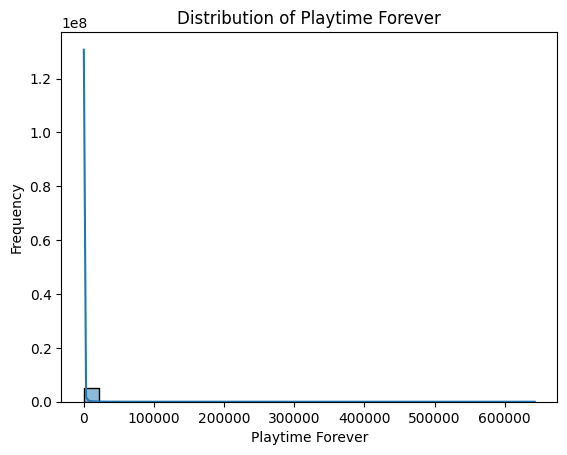

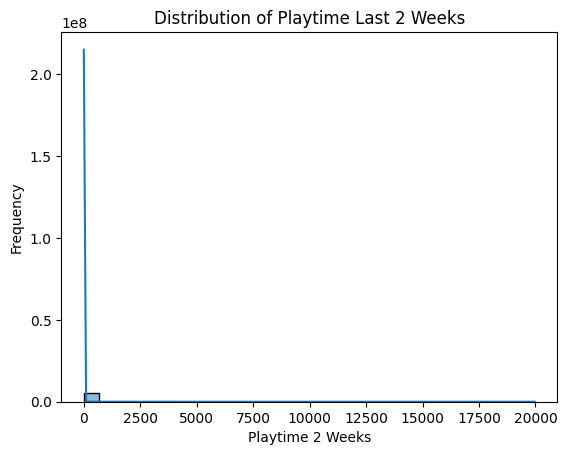

In [5]:
# Histograma de playtime_forever
sns.histplot(df_combined['playtime_forever'], bins=30, kde=True)
plt.xlabel('Playtime Forever')
plt.ylabel('Frequency')
plt.title('Distribution of Playtime Forever')
plt.show()

# Histograma de playtime_2weeks
sns.histplot(df_combined['playtime_2weeks'], bins=30, kde=True)
plt.xlabel('Playtime 2 Weeks')
plt.ylabel('Frequency')
plt.title('Distribution of Playtime Last 2 Weeks')
plt.show()


In [6]:
# Top usuarios por playtime_forever
top_users_playtime = df_combined.groupby('user_id')['playtime_forever'].sum().sort_values(ascending=False).head(10)
print(top_users_playtime)


user_id
REBAS_AS_F-T         4660393
shinomegami          3303502
Sp3ctre              2822860
DownSyndromeKid      2790419
76561198022404680    2757452
76561198018677971    2632260
76561198063648921    2608204
clawbot44            2115240
Harkugan             2053512
xXAussieRockXx       1965704
Name: playtime_forever, dtype: int64


In [7]:
# Top juegos por playtime_forever
top_games_playtime = df_combined.groupby('item_name')['playtime_forever'].sum().sort_values(ascending=False).head(10)
print(top_games_playtime)


item_name
Counter-Strike: Global Offensive    804424125
Garry's Mod                         461503400
Terraria                            159012529
The Elder Scrolls V: Skyrim         140337296
Warframe                            126656095
Counter-Strike: Source              115232911
Left 4 Dead 2                       104192995
PAYDAY 2                            102508818
Sid Meier's Civilization V           84834320
Rust                                 83173464
Name: playtime_forever, dtype: int64


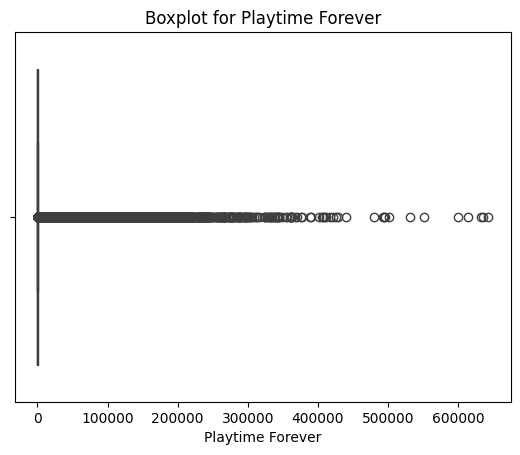

In [8]:
# Boxplot para playtime_forever
sns.boxplot(x=df_combined['playtime_forever'])
plt.xlabel('Playtime Forever')
plt.title('Boxplot for Playtime Forever')
plt.show()
